<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_PyTorchTraining/blob/main/IG_FER_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["KAGGLE_USERNAME"] = "ravikanttyagi"
os.environ["KAGGLE_KEY"] = "25515d47526c5940215de7a00cc56fc8"

!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

100% 285M/285M [00:01<00:00, 238MB/s]
100% 285M/285M [00:01<00:00, 228MB/s]


In [2]:
!unzip challenges-in-representation-learning-facial-expression-recognition-challenge.zip

Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


In [44]:
import torch
from torch import nn
import torchvision
from torch.utils import data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
device

device(type='cuda')

In [7]:
train_df = pd.read_csv("train.csv")

In [8]:
train_df.shape

(28709, 2)

In [9]:
train_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [10]:
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [11]:
# returns string type of data
img = train_df['pixels'][0]

In [12]:
img

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [13]:
train_df['new_pixels'] = [[int(y)for y in x.split()] for x in train_df["pixels"]]

In [14]:
train_df.head()

,emotion,pixels,new_pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23..."


In [15]:
# type cast list into array
img = np.array(train_df["new_pixels"][0])
img = img.reshape((48,48))

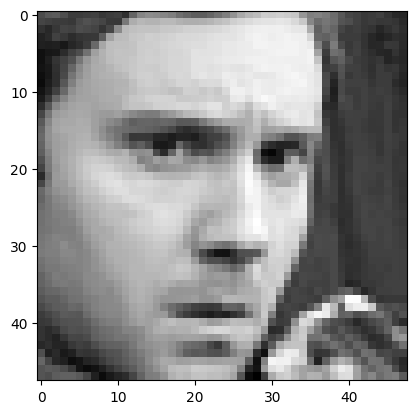

In [16]:
plt.imshow(img, cmap="gray")
plt.show()

In [17]:
test_df = pd.read_csv("test.csv")

In [18]:
test_df.shape

(7178, 1)

In [19]:
test_df.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [20]:
test_df['new_pixels'] = [[int(y)for y in x.split()] for x in test_df["pixels"]]

In [21]:
# test_img = test_df["new_pixels"][0]

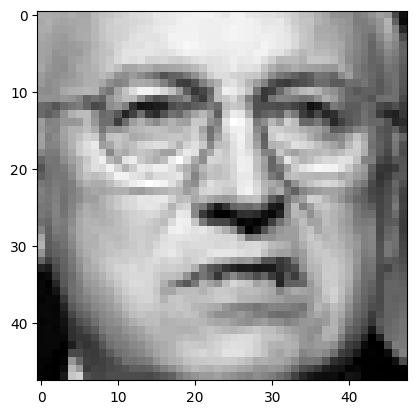

In [22]:
# type cast list into array
test_img = np.array(test_df["new_pixels"][160])
test_img = test_img.reshape((48,48))
plt.imshow(test_img, cmap="gray")
plt.show()

In [37]:
# Inherit Dataset class coming from data package
class Dataset(data.Dataset):
  def __init__(self, df):
    self.df = df

  def __len__(self):
    return len(self.df)
  
  def __getitem__(self, index):
    # loading data - one image at a time
    x = self.df.iloc[index]["new_pixels"]
    x = np.array(x).reshape(48,48,1)
    x = torch.tensor(x)
    y = self.df.iloc[index]["emotion"]
    # x = torch.cat((x,),0)
    return x, y


In [38]:
training_set = Dataset(train_df)

In [39]:
training_set

In [40]:
params = {"batch_size":64, "shuffle":True}
training_generator = data.DataLoader(training_set, **params)

In [41]:
training_generator

In [42]:
training_set[100][1]

3

In [43]:
training_set[100][0].shape

torch.Size([48, 48, 1])

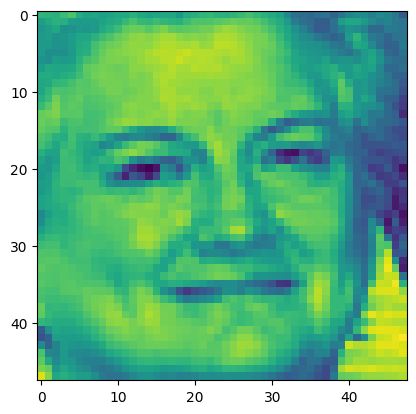

In [30]:
plt.imshow(training_set[100][0].squeeze())
plt.show()

In [45]:
# Custom CNN Architecture
# Pre-trained CNN Architecture - VGG16, VGG19, Inception, ResNet50, ResNet101, ResNet152, MobileNet
# All pre-trained architecture are trained on Imagenet dataset with 1000 classes

class FERModel(nn.Module):
  # Blocks
  def __init__(self, input_shape, num_classes):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=32, kernel_size=(3,3)),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3)),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2))
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3)),
        nn.ReLU(),
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3)),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2))
    )

    self.block_3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=256, out_features=num_classes)
    )

  def forward(self, x):
    print("Step : 1",x.shape)
    x = self.block_1(x)
    print("Step : 2",x.shape)
    x = self.block_2(x)
    x = self.block_3(x)
    return x

In [46]:
# input_shape=1 - we have 1 color channel only
# num_classes=7 - we have 7 categories in our dataset
model = FERModel(input_shape=1, num_classes=7).to(device)

In [47]:
model

FERModel(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=256, out_features=7, bias=True)
  )
)

In [48]:
# Evaluation metric
def accuracy(y_true, y_pred):
  # y_true = 1, y_pred = 1
  # y_true = 0, y_pred = 0
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc

def train_step(model, data, loss_fn, optimizer):
  train_loss, train_acc = 0,0
  model.to(device)

  for batch, (X, y) in enumerate(data):
    X,y = X.to(device), y.to(device)

    # Feedforward - it calls forward method inside Model Class
    y_pred = model(X)
    # Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy(y, y_pred.argmax(dim=1))

    # Backpropagate
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data)
  train_acc /= len(data)
  print(f"Train Loss : {train_loss:.3f} |  Train Acc : {train_acc:.3f}")


def test_step(model, data, loss_fn, optimizer):
  test_loss, test_acc = 0,0
  model.to(device)
  model.to(eval)

  with torch.inference_mode():
    for batch, (X, y) in enumerate(data):
      X,y = X.to(device), y.to(device)

      # Feedforward - it calls forward method inside Model Class
      y_pred = model(X)
      # Calculate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss
      test_acc += accuracy(y, y_pred.argmax(dim=1))

    test_loss /= len(data)
    test_acc /= len(data)
    print(f"Test Loss : {test_loss:.3f} |  Test Acc : {test_acc:.3f}")